# Import Tax Parcel df
Read in the tax parcel dataframe in order to isolate the latitude and longitude to make a clean import into the QGIS program.  Then use the QGIS program to select the coordinates within the pyroclastic flow zone.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/Tax_Parcels_Trimmed.csv')
df.head()

,TaxParcelNumber,TaxParcelType,TaxParcelUnitType,EditDate,Delivery_Address,City_State,Zipcode,Site_Address,Land_Acres,Land_Value,Improvement_Value,Taxable_Value,Tax_Area_Code,Landuse_Description,X_Coordinate,Y_Coordinate,Longitude,Latitude,Shape__Area,Shape__Length
0,21247005,Base Parcel,,1998-07-24T00:00:00.000Z,UNKNOWN PARTY ADDRESS,"UNKNOWN CITY, WA",NaN,XXX 34TH STCT NW,0.0000,0,0,0,471,UNKNOWN,1.081288e+06,721057.9755,-122.75325,47.28867,38758.018311,1141.837123
1,21247006,Base Parcel,NaN,2014-11-26T12:23:33.000Z,3211 MCEWAN ROAD NW,"LAKEBAY, WA",98349,3211 MCEWAN RD NW,7.6300,364000,1129400,1493400,471,SINGLE FAMILY DWELLING,1.080163e+06,720458.5894,-122.75771,47.28694,345604.122986,3638.028072
2,21247007,Base Parcel,,2014-11-26T12:23:33.000Z,3211 MCEWAN ROAD NW,"LAKEBAY, WA",98349,3209 MCEWAN RD NW,2.8700,251400,0,251400,471,VACANT LAND UNDEVELOPED,1.081042e+06,720375.4829,-122.75416,47.28678,133528.313354,2089.154656
3,21247700,Base Parcel,,1996-01-23T00:00:00.000Z,PO BOX 670,"LAKEBAY, WA",98349-0670,XXX Undetermined Situs,1.3174,33900,0,33900,471,VACANT LAND UNDEVELOPED,1.080063e+06,720851.0629,-122.75815,47.28801,60097.457336,1243.548915
4,21247701,Base Parcel,,1996-01-23T00:00:00.000Z,PO BOX 670,"LAKEBAY, WA",98349-0670,16407 33RD STCT NW,2.7100,251200,563200,814400,471,SINGLE FAMILY DWELLING,1.080827e+06,720849.5547,-122.75508,47.28806,122531.592957,2293.364640


In [3]:
lat_long =pd.DataFrame()

In [4]:
lat_long['latitude'] =df['Latitude']

In [5]:
lat_long['longitude'] =df['Longitude']

In [6]:
lat_long.head()

,latitude,longitude
0,47.28867,-122.75325
1,47.28694,-122.75771
2,47.28678,-122.75416
3,47.28801,-122.75815
4,47.28806,-122.75508


In [7]:
lat_long.shape

(327319, 2)

In [8]:
lat_long.to_csv('../data/latlong.csv', index=False)

# Pyro-flow zone coordinates
Read in the coordinates within the pyroclastic flow zone to check the shape and mark the rows.

In [9]:
danger =pd.read_csv('../data/danger_parcels.csv')

In [10]:
danger.head()

,OBJECTID,CASE_1,CASE_2,CASE_3,SYMBOL,TIME_ZONE,latitude,longitude
0,53,Y,NaN,NaN,1,D,47.08061,-122.68482
1,53,Y,NaN,NaN,1,D,47.08191,-122.69244
2,53,Y,NaN,NaN,1,D,47.08182,-122.68759
3,53,Y,NaN,NaN,1,D,47.08015,-122.69965
4,53,Y,NaN,NaN,1,D,47.07836,-122.70014


In [11]:
danger.shape

(28952, 8)

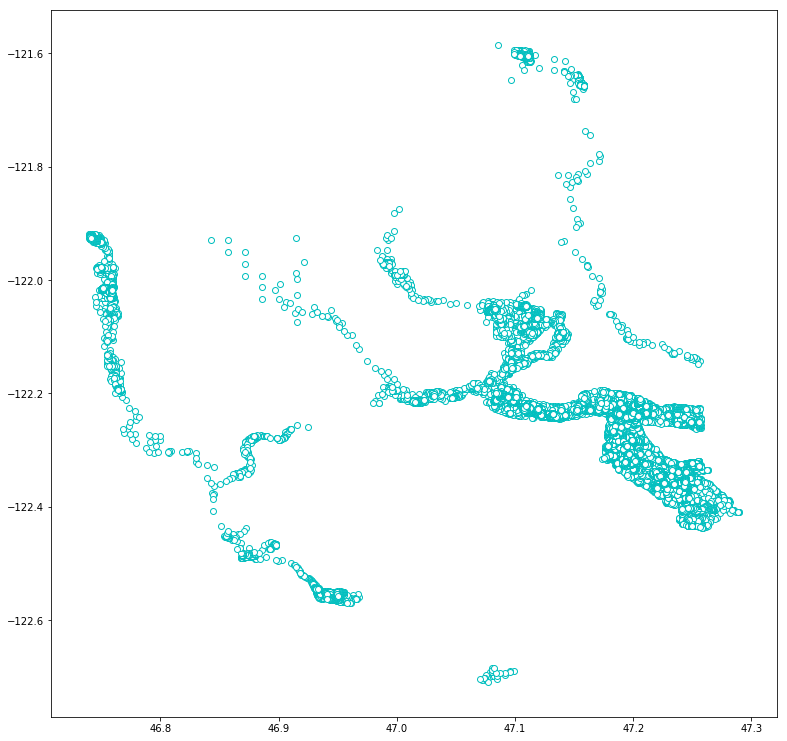

In [12]:
#check the shape of the lat/long to make sure the layer join worked.
plt.figure(figsize=(13, 13))
plt.scatter(danger['latitude'], danger['longitude'], c='w', edgecolor ='c');

In [13]:
danger['is_threatened'] = True

In [14]:
danger.head(2)

,OBJECTID,CASE_1,CASE_2,CASE_3,SYMBOL,TIME_ZONE,latitude,longitude,is_threatened
0,53,Y,NaN,NaN,1,D,47.08061,-122.68482,True
1,53,Y,NaN,NaN,1,D,47.08191,-122.69244,True


In [15]:
danger.shape

(28952, 9)

In [16]:
#rename to make column names identical for future merging
danger = danger.rename(columns={'latitude':'Latitude',
                       'longitude':'Longitude'})
danger.head(2)

,OBJECTID,CASE_1,CASE_2,CASE_3,SYMBOL,TIME_ZONE,Latitude,Longitude,is_threatened
0,53,Y,NaN,NaN,1,D,47.08061,-122.68482,True
1,53,Y,NaN,NaN,1,D,47.08191,-122.69244,True


In [17]:
# Remap all Y to 1

danger['CASE_1'] = danger['CASE_1'].map({'Y': 1})

danger['CASE_2'] = danger['CASE_2'].map({'Y': 1})

danger['CASE_3'] = danger['CASE_3'].map({'Y': 1})

In [18]:
print(danger.CASE_1.value_counts())
print(danger.CASE_2.value_counts())
print(danger.CASE_3.value_counts())

1.0    28928
Name: CASE_1, dtype: int64
1.0    22726
Name: CASE_2, dtype: int64
1.0    12
Name: CASE_3, dtype: int64


In [19]:
danger.isna().sum()

OBJECTID             0
CASE_1              24
CASE_2            6226
CASE_3           28940
SYMBOL               0
TIME_ZONE           49
Latitude            23
Longitude           23
is_threatened        0
dtype: int64

In [20]:
# drop useless columns
danger.drop(columns=['TIME_ZONE', 'SYMBOL', 'OBJECTID'], inplace=True)

In [21]:
danger.isna().sum()

CASE_1              24
CASE_2            6226
CASE_3           28940
Latitude            23
Longitude           23
is_threatened        0
dtype: int64

In [22]:
# All null values from lat/long come from the same rows, so the 
# dataframe is set to the rows where latitude are not null.
danger = danger[~danger["Latitude"].isna()]

In [23]:
danger.shape

(28929, 6)

In [24]:
danger.is_threatened.value_counts()

True    28929
Name: is_threatened, dtype: int64

In [25]:
# Nulls will be set to 0 after merging
danger.isna().sum()

CASE_1              22
CASE_2            6208
CASE_3           28927
Latitude             0
Longitude            0
is_threatened        0
dtype: int64

## Merge DataFrames

---

In [28]:
#import clean df
clean = pd.read_csv('../data/Tax_Parcels_Trimmed.csv')

In [29]:
clean.shape

(327319, 20)

In [30]:
danger["Latitude"] = round(danger["Latitude"], 5)
danger["Longitude"] = round(danger["Longitude"], 5)

clean["Latitude"] = round(clean["Latitude"], 5)
clean["Longitude"] = round(clean["Longitude"], 5)

In [31]:
#merge imported cleaned df and the cleaned 'threatened'df
threat = pd.merge(clean,danger, how='left', on=['Longitude', 'Latitude'])
threat.head()

,TaxParcelNumber,TaxParcelType,TaxParcelUnitType,EditDate,Delivery_Address,City_State,Zipcode,Site_Address,Land_Acres,Land_Value,...,X_Coordinate,Y_Coordinate,Longitude,Latitude,Shape__Area,Shape__Length,CASE_1,CASE_2,CASE_3,is_threatened
0,21247005,Base Parcel,,1998-07-24T00:00:00.000Z,UNKNOWN PARTY ADDRESS,"UNKNOWN CITY, WA",NaN,XXX 34TH STCT NW,0.0000,0,...,1.081288e+06,721057.9755,-122.75325,47.28867,38758.018311,1141.837123,NaN,NaN,NaN,NaN
1,21247006,Base Parcel,NaN,2014-11-26T12:23:33.000Z,3211 MCEWAN ROAD NW,"LAKEBAY, WA",98349,3211 MCEWAN RD NW,7.6300,364000,...,1.080163e+06,720458.5894,-122.75771,47.28694,345604.122986,3638.028072,NaN,NaN,NaN,NaN
2,21247007,Base Parcel,,2014-11-26T12:23:33.000Z,3211 MCEWAN ROAD NW,"LAKEBAY, WA",98349,3209 MCEWAN RD NW,2.8700,251400,...,1.081042e+06,720375.4829,-122.75416,47.28678,133528.313354,2089.154656,NaN,NaN,NaN,NaN
3,21247700,Base Parcel,,1996-01-23T00:00:00.000Z,PO BOX 670,"LAKEBAY, WA",98349-0670,XXX Undetermined Situs,1.3174,33900,...,1.080063e+06,720851.0629,-122.75815,47.28801,60097.457336,1243.548915,NaN,NaN,NaN,NaN
4,21247701,Base Parcel,,1996-01-23T00:00:00.000Z,PO BOX 670,"LAKEBAY, WA",98349-0670,16407 33RD STCT NW,2.7100,251200,...,1.080827e+06,720849.5547,-122.75508,47.28806,122531.592957,2293.364640,NaN,NaN,NaN,NaN


In [32]:
clean.isna().sum()

TaxParcelNumber            0
TaxParcelType              0
TaxParcelUnitType      15485
EditDate                   6
Delivery_Address          38
City_State                 0
Zipcode                 2802
Site_Address               0
Land_Acres                 0
Land_Value                 0
Improvement_Value          0
Taxable_Value              0
Tax_Area_Code              0
Landuse_Description        3
X_Coordinate               0
Y_Coordinate               0
Longitude                  0
Latitude                   0
Shape__Area                0
Shape__Length              0
dtype: int64

In [33]:
threat.isna().sum()

TaxParcelNumber             0
TaxParcelType               0
TaxParcelUnitType       15494
EditDate                    6
Delivery_Address           38
City_State                  0
Zipcode                  2803
Site_Address                0
Land_Acres                  0
Land_Value                  0
Improvement_Value           0
Taxable_Value               0
Tax_Area_Code               0
Landuse_Description         3
X_Coordinate                0
Y_Coordinate                0
Longitude                   0
Latitude                    0
Shape__Area                 0
Shape__Length               0
CASE_1                 298412
CASE_2                 305022
CASE_3                 328085
is_threatened          298390
dtype: int64

In [34]:
threat.shape

(328087, 24)

In [35]:
# for some reason gains 1000 rows.
threat['is_threatened'].value_counts()

True    29697
Name: is_threatened, dtype: int64

In [36]:
threat['is_threatened'].fillna(False, inplace = True)

threat['CASE_1'].fillna(value =0, inplace=True)

threat['CASE_2'].fillna(value=0, inplace=True)

threat['CASE_3'].fillna(value=0, inplace=True)

In [37]:
threat[['is_threatened', "CASE_1", "CASE_2", "CASE_3"]].isna().sum()

is_threatened    0
CASE_1           0
CASE_2           0
CASE_3           0
dtype: int64

In [38]:
#export merged dataframe
threat.to_csv('../data/danger_tax_robinson.csv', index=False)

# EDA

In [39]:
data = pd.read_csv('../data/danger_tax_robinson.csv')

In [40]:
#mask is_threatened to check
data['is_threatened'].value_counts()

False    298390
True      29697
Name: is_threatened, dtype: int64

In [41]:
allthreat = data[data['is_threatened'] ==True]

In [42]:
allthreat.shape

(29697, 24)

In [43]:
#replot the threatened observation to see why we lost some.
#plt.figure(figsize=(13, 13))
#plt.scatter(threat['Latitude'], threat['Longitude'], c='w', edgecolor ='c')
#plt.title('Latitude v Longitude');

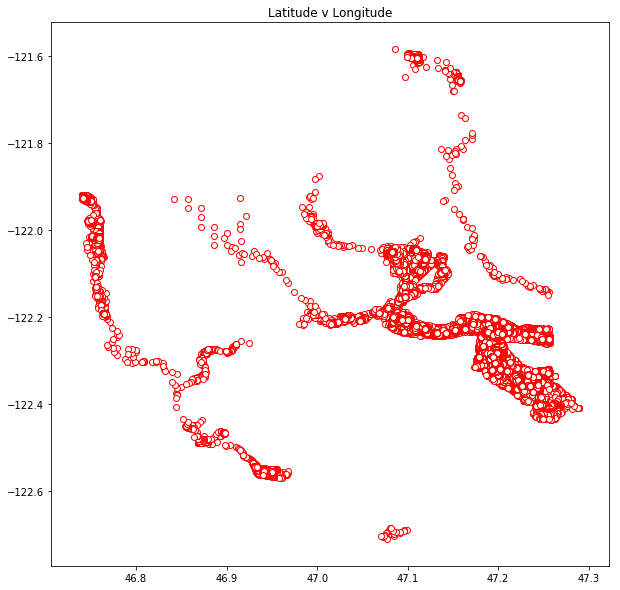

In [44]:
plt.figure(figsize=(10, 10))
plt.scatter(allthreat['Latitude'], allthreat['Longitude'], c='w', edgecolor ='r')
plt.title('Latitude v Longitude');

In [45]:
#mask case 1 to plot
case1 = data[data['CASE_1'] ==True]
case1.shape

(29675, 24)

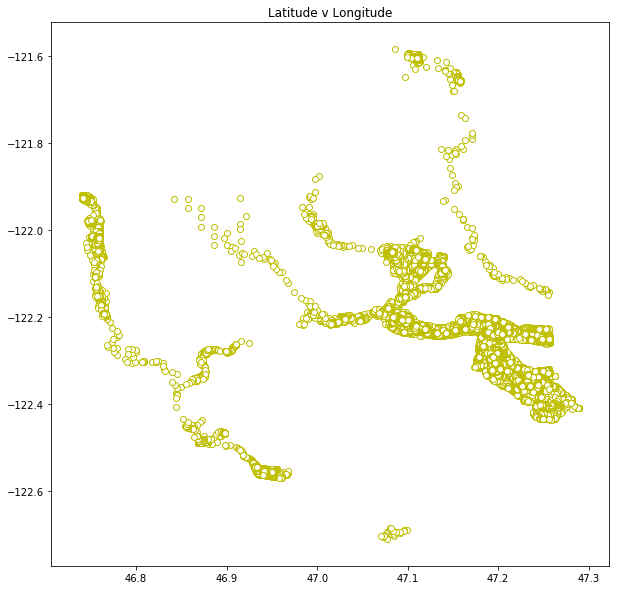

In [46]:
#try plotting the cases to visualize
plt.figure(figsize=(10, 10))
plt.scatter(case1['Latitude'], case1['Longitude'], c='w', edgecolor ='y')
plt.title('Latitude v Longitude');

In [47]:
#mask case 2 to plot
case2 = data[data['CASE_2'] ==True]
case2.shape

(23065, 24)

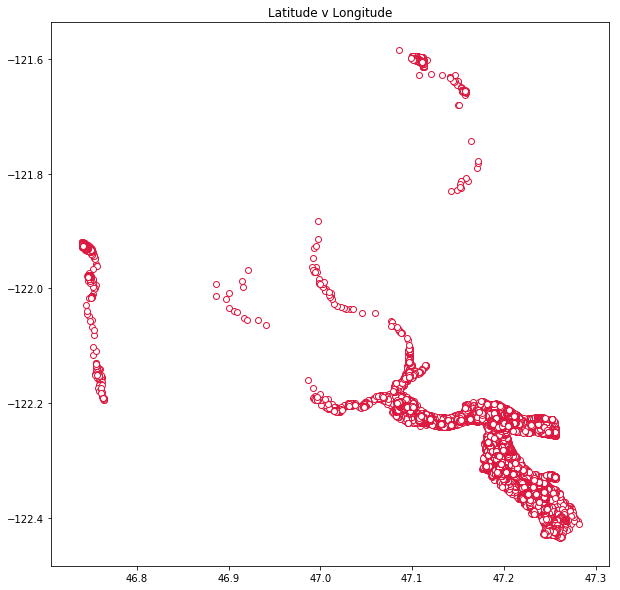

In [48]:
plt.figure(figsize=(10, 10))
plt.scatter(case2['Latitude'], case2['Longitude'], c='w', edgecolor ='crimson')
plt.title('Latitude v Longitude');

In [49]:
# case 3 has very few observations
case3 = data[data['CASE_3'] ==True]
case3.shape

(2, 24)